# Sentiment Analysis
In this project we will develop models for sentiment analysis

## the easy way

In [3]:
from transformers import pipeline

sentiment_analysis = pipeline ( 'sentiment-analysis' )

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
sentiment_analysis('I love to try these models')

[{'label': 'POSITIVE', 'score': 0.9992508292198181}]

In [5]:
sentiment_analysis ( 'I love to not use these models' )

[{'label': 'NEGATIVE', 'score': 0.9859663844108582}]

In [6]:
sentiment_analysis ( 'It is not that good, but it is not that bad either' )

[{'label': 'POSITIVE', 'score': 0.9813719987869263}]

In [7]:
sentiment_analysis ( 'I dont like it but if the opportunity comes I will try it again ' )

[{'label': 'POSITIVE', 'score': 0.9776403903961182}]

In [8]:
sentiment_analysis ( 'I like it, and I hate it' )

[{'label': 'POSITIVE', 'score': 0.9241565465927124}]

In [9]:
sentiment_analysis ('I hate it, and I like it')

[{'label': 'POSITIVE', 'score': 0.9976879358291626}]

## Other ways

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sentiment_analysis
import plotly.express as px
import nltk

### Using NLTK

In [26]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hh\AppData\Roaming\nltk_data...


True

In [5]:
df = pd.read_csv ( 'archive/AmazonFineFoods3k.csv', header = None )
df

,0,1,2,3,4,5,6,7,8,9
0,565455,B002GKEK7G,A2BOPOKO6HKS3E,Stacey Walker,0,0,5,1317945600,My daily pick-me-up,I LOVE Click! My favorite protein drink by fa...
1,565456,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
2,565457,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
3,565458,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
4,565459,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...
...,...,...,...,...,...,...,...,...,...,...
2995,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
2996,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
2997,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
2998,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [9]:
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'rating', 'col8', 'review', 'full_review']
df

,col1,col2,col3,col4,col5,col6,rating,col8,review,full_review
0,565455,B002GKEK7G,A2BOPOKO6HKS3E,Stacey Walker,0,0,5,1317945600,My daily pick-me-up,I LOVE Click! My favorite protein drink by fa...
1,565456,B002GKEK7G,A1RJXXXKCCBRW1,curlymeg,0,0,4,1316304000,great drink,This is a nice drink when I have my chocolate ...
2,565457,B002GKEK7G,A18HMM4NUF4CJA,Kathy Little,0,0,5,1315612800,"Best tasting, hands down.",I have been drinking Click for almost two year...
3,565458,B002GKEK7G,A3TM73X9E4X44C,Lovingliving 990,0,0,5,1314835200,AWESOME PRODUCT,This is such a wonderful product. There is no...
4,565459,B002GKEK7G,A1N0A7NKLEZHIK,Chris S.,0,0,5,1314144000,Click starts my day!,Click is my protein drink every single morning...
...,...,...,...,...,...,...,...,...,...,...
2995,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
2996,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
2997,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
2998,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [10]:
df = df [['rating', 'review', 'full_review']]
df

,rating,review,full_review
0,5,My daily pick-me-up,I LOVE Click! My favorite protein drink by fa...
1,4,great drink,This is a nice drink when I have my chocolate ...
2,5,"Best tasting, hands down.",I have been drinking Click for almost two year...
3,5,AWESOME PRODUCT,This is such a wonderful product. There is no...
4,5,Click starts my day!,Click is my protein drink every single morning...
...,...,...,...
2995,5,Will not do without,Great for sesame chicken..this is a good if no...
2996,2,disappointed,I'm disappointed with the flavor. The chocolat...
2997,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
2998,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


<AxesSubplot: title={'center': 'number of reviews per rating'}>

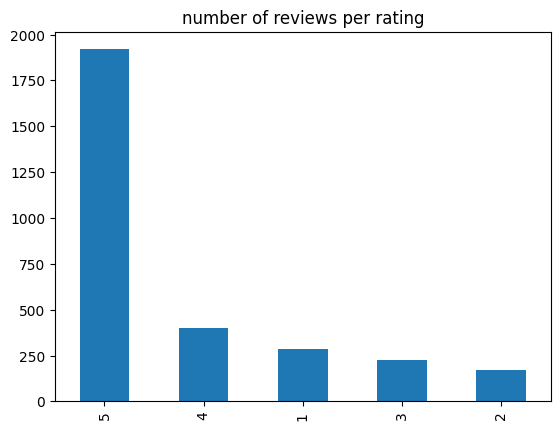

In [13]:
df ['rating'].value_counts().plot ( kind = 'bar', title = 'number of reviews per rating' )

Basic NLTK

In [16]:
exemple = df ['full_review'][0]
exemple 

'I LOVE Click!  My favorite protein drink by far.  I add a little sugar-free caramel coffee syrup and a few drops coconut extract.  Tastes just like a Samoa.'

In [24]:
tokens= nltk.word_tokenize (exemple)
tokens [:10]

['I', 'LOVE', 'Click', '!', 'My', 'favorite', 'protein', 'drink', 'by', 'far']

In [28]:
tags = nltk.pos_tag ( tokens )
tags [:10]

[('I', 'PRP'),
 ('LOVE', 'VBP'),
 ('Click', 'RB'),
 ('!', '.'),
 ('My', 'NNP'),
 ('favorite', 'JJ'),
 ('protein', 'NN'),
 ('drink', 'NN'),
 ('by', 'IN'),
 ('far', 'RB')]

In [31]:
entities = nltk.chunk.ne_chunk (tags)
entities.pprint()

(S
  I/PRP
  LOVE/VBP
  (PERSON Click/RB)
  !/.
  My/NNP
  favorite/JJ
  protein/NN
  drink/NN
  by/IN
  far/RB
  ./.
  I/PRP
  add/VBP
  a/DT
  little/JJ
  sugar-free/JJ
  caramel/NN
  coffee/NN
  syrup/NN
  and/CC
  a/DT
  few/JJ
  drops/NNS
  coconut/VBP
  extract/NN
  ./.
  Tastes/VBZ
  just/RB
  like/IN
  a/DT
  Samoa/NNP
  ./.)


Using VADER (From NLTK) for sentiment analysis

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [35]:
sia = SentimentIntensityAnalyzer (  )

In [40]:
sia.polarity_scores ( 'My name is Hamza' )

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [43]:
sia.polarity_scores (exemple)

{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.8939}

In [48]:
dic = {}
dic2 = {}
for exemple in df['full_review']:
    score =  sia.polarity_scores ( exemple )
    dic [exemple] = score
    

In [70]:
df_scores = pd.DataFrame ( dic ).T
df_scores = df_scores.reset_index()
df_scores = df_scores.rename ( columns = {'index' : 'full_review'} )
df_scores

,full_review,neg,neu,pos,compound
0,I LOVE Click! My favorite protein drink by fa...,0.000,0.651,0.349,0.8939
1,This is a nice drink when I have my chocolate ...,0.000,0.714,0.286,0.8313
2,I have been drinking Click for almost two year...,0.000,0.923,0.077,0.6369
3,This is such a wonderful product. There is no...,0.046,0.828,0.126,0.5994
4,Click is my protein drink every single morning...,0.000,0.892,0.108,0.6696
...,...,...,...,...,...
2990,Great for sesame chicken..this is a good if no...,0.072,0.600,0.327,0.8589
2991,I'm disappointed with the flavor. The chocolat...,0.190,0.697,0.114,-0.4848
2992,"These stars are small, so you can give 10-15 o...",0.037,0.884,0.078,0.4352
2993,These are the BEST treats for training and rew...,0.041,0.506,0.452,0.9717


In [78]:
df_scores_rating =df_scores.merge (  df['rating'][0:2995], left_index = True, right_index = True)
df_scores_rating

,full_review,neg,neu,pos,compound,rating
0,I LOVE Click! My favorite protein drink by fa...,0.000,0.651,0.349,0.8939,5
1,This is a nice drink when I have my chocolate ...,0.000,0.714,0.286,0.8313,4
2,I have been drinking Click for almost two year...,0.000,0.923,0.077,0.6369,5
3,This is such a wonderful product. There is no...,0.046,0.828,0.126,0.5994,5
4,Click is my protein drink every single morning...,0.000,0.892,0.108,0.6696,5
...,...,...,...,...,...,...
2990,Great for sesame chicken..this is a good if no...,0.072,0.600,0.327,0.8589,5
2991,I'm disappointed with the flavor. The chocolat...,0.190,0.697,0.114,-0.4848,5
2992,"These stars are small, so you can give 10-15 o...",0.037,0.884,0.078,0.4352,2
2993,These are the BEST treats for training and rew...,0.041,0.506,0.452,0.9717,5


In [85]:
df_scores_sorted = df_scores_rating.sort_values ( by = 'rating' )
df_scores_sorted

,full_review,neg,neu,pos,compound,rating
905,My daughter and I were so excited to find thes...,0.120,0.827,0.054,-0.8514,1
2684,Quick pick up when the office grind is wearing...,0.000,1.000,0.000,0.0000,1
458,"Seemed like a great idea, and my dog loved it,...",0.074,0.649,0.277,0.9676,1
2145,It has artificial sweetener which not only tas...,0.000,0.816,0.184,0.8412,1
2692,"Love, love these K-cups. I'm a Starbucks junk...",0.000,0.744,0.256,0.9411,1
...,...,...,...,...,...,...
1207,These treats are for my two little (spoiled) d...,0.000,0.732,0.268,0.9744,5
1208,There is NOTHING on the market like these trea...,0.046,0.810,0.144,0.9389,5
1209,My pup can't have anything with grains in it a...,0.000,0.837,0.163,0.6467,5
1187,My son's pediatrician recommended this to add ...,0.025,0.862,0.113,0.6460,5


In [88]:
px.bar( data_frame = df_scores_sorted, x = 'rating', y = 'pos', width = 500, height = 400 )

In [89]:
px.bar( data_frame = df_scores_sorted, x = 'rating', y = 'neg', width = 500, height = 400 )

In [90]:
px.bar( data_frame = df_scores_sorted, x = 'rating', y = 'neu', width = 500, height = 400 )

### Using ROBERTA Pretrained model

In [91]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification 
from scipy.special import softmax

In [95]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained ( MODEL )
model = AutoModelForSequenceClassification.from_pretrained ( MODEL )

In [96]:
exemple 

'I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.'

In [97]:
sia.polarity_scores (exemple)

{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.4754}

In [98]:
tokenizer ("I am satisfied")

{'input_ids': [0, 100, 524, 10028, 2], 'attention_mask': [1, 1, 1, 1, 1]}

In [99]:
tokenizer ("I am not satisfied")

{'input_ids': [0, 100, 524, 45, 10028, 2], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [118]:
encoded_exemple =  tokenizer ( exemple, return_tensors = 'pt'  )
out = model (**encoded_exemple)
scores = out[0][0].detach().numpy()
scores = softmax (scores)
scores_dic = { 
    'roberta_neg' : scores[0],
    'roberta_pos' : scores[1],
    'roberta_neu' : scores[2]
}
scores_dic

{'roberta_neg': 0.0017705038,
 'roberta_pos': 0.037866924,
 'roberta_neu': 0.9603626}

In [129]:
def get_roberta_scores (exemple):
    encoded_exemple =  tokenizer ( exemple, return_tensors = 'pt'  )
    out = model (**encoded_exemple)
    scores = out[0][0].detach().numpy()
    scores = softmax (scores)
    scores_dic = { 
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dic


In [130]:
get_roberta_scores (exemple)

{'roberta_neg': 0.0017705038,
 'roberta_neu': 0.037866924,
 'roberta_pos': 0.9603626}

In [135]:
roberta_res = {}
for review in tqdm (df["full_review"], total = len (df["full_review"])):
    try:
        score = get_roberta_scores (review)
        roberta_res [review] = score

    except RuntimeError:
        print ( 'cant get scores for {}'.format(review) )


  0%|          | 0/3000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [132]:
roberta_res

{'I LOVE Click!  My favorite protein drink by far.  I add a little sugar-free caramel coffee syrup and a few drops coconut extract.  Tastes just like a Samoa.': {'roberta_neg': 0.0017047066,
  'roberta_neu': 0.008971303,
  'roberta_pos': 0.98932403},
 'This is a nice drink when I have my chocolate craving.  I sometimes only use one scoop of mix and I mix with milk and ice and its great!': {'roberta_neg': 0.0014756866,
  'roberta_neu': 0.0141808335,
  'roberta_pos': 0.9843435},
 "I have been drinking Click for almost two years now. It is, by far, the best tasting Protein drink available. I mix it half and half with another chocolate protein so I don't get as much caffeine. I have tried dozens of other brands, in all price ranges, and I always come back to this one.": {'roberta_neg': 0.004981359,
  'roberta_neu': 0.044961605,
  'roberta_pos': 0.95005697},
 'This is such a wonderful product.  There is no protein taste at all.  It mixes easily in a blender bottle with whirly ball.  It keep

In [133]:
pd.DataFrame ( roberta_res ).T

,roberta_neg,roberta_neu,roberta_pos
I LOVE Click! My favorite protein drink by far. I add a little sugar-free caramel coffee syrup and a few drops coconut extract. Tastes just like a Samoa.,0.001705,0.008971,0.989324
This is a nice drink when I have my chocolate craving. I sometimes only use one scoop of mix and I mix with milk and ice and its great!,0.001476,0.014181,0.984344
"I have been drinking Click for almost two years now. It is, by far, the best tasting Protein drink available. I mix it half and half with another chocolate protein so I don't get as much caffeine. I have tried dozens of other brands, in all price ranges, and I always come back to this one.",0.004981,0.044962,0.950057
This is such a wonderful product. There is no protein taste at all. It mixes easily in a blender bottle with whirly ball. It keeps me full for so much longer than most breakfast items and taste incredible. I will be ordering this again very soon.,0.002107,0.008706,0.989187
Click is my protein drink every single morning! Love knocking out my first protein drink as a hot coffee. After having surgery I have had to include 2 protein drinks everyday to my diet and Click has helped me do that.,0.003866,0.059535,0.936599
...,...,...,...
"I have tried many (and I do mean many) protein drinks and I must say that CLICK is far above any of the others. What's not to like? Mixes quickly and easily (a common flaw with other powdered protein drinks). Low calories (120). Zero saturated fat. Negligible sodium (105mg). Low carbs (12g). Decent protein (15g). All of this with a 31g/2 scoop serving. And, most importantly, superb taste PLUS a caffeine kick for workout momentum. You just cannot lose with CLICK, whether it's the Mocha or newest Vanilla Latte flavor. I must sound like a sales rep for this product, but in reality, I am just a regular guy at the gym who enjoys lifting weights and fat-burn cardio. I simply do not have enough superlatives to describe how much I like and enjoy this one-drink-does-it-all product. As far as I'm concerned, it is not only the best of the best, but the only protein drink I need or will ever want!",0.017573,0.091473,0.890954
"I have been a daily user of Mocha Click for quite a while, and love the product. I'm not really a lover of vanilla things, but I'm glad I gave this product a try. Vanilla Latte doesn't have an overpowering vanilla taste, thankfully...just enough! I mixed mine up with skim milk and crushed ice in a blender and got a fabulous-tasting drink, way better than any Starbucks concoction! This product gets 5 stars!",0.002129,0.008922,0.988949
this is my frist time trying click. it really good i mixed it with water. the problem i'm having is where is the vanilla i taste none what so ever. maybe it me. I guess i have to add my own flavoring. but it good and it mixs really well kinda like a expresso treat without all the fat.,0.019012,0.106789,0.874199
"I don't like vanilla as a stand alone flavor. Usually, it is just a pale imitation of the rich smoothness of a real vanilla bean. I have been loving on the Mocha Espresso flavor CLICK for at least a year now and was excited at the thought of another flavor. I didn't think Vanilla Latte could measure up to the Mocha and boy, was I wrong. The vanilla is a sweet smooth flavor with a hint of caramel in the background. It is not the cloying fake vanilla and sweetness overload I have experienced with other vanilla flavored proteins. It dissolves perfectly, has caffeine, and doesn't have that offensive sour protein shake smell, either. Mocha Espresso and Vanilla Latte are a winning twosome and I look forward to enjoying them both for a very long time.",0.030324,0.119416,0.850260
